# Linear Regression

Linear Regression is one of the most common predictive methods in the arsenal of a (computational) social scientist or data scientist.
We should consider using this method if we want to be able to 
predict continuous output based on a continuous independent variable, and if we 
have good reason to believe the relationship between the two continuous variables is linear (i.e. as the value of x increases, y increases or decreases proportionally). 

There are two types of linear:

* Simple Linear Regression
* Multiple Linear Regression

Both can be implemented using the Python library scikit-learn.
We will practice using the relevant scikit-learn class on a dataset that contains returns of Istanbul Stock Exchange. Note that the column ISE.1 is USD-based, whereas the column ISE is based on the Turkish lira. 

In [ ]:
import pandas as pd

istanbul_stock_exchange = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx', header=1)
istanbul_stock_exchange = istanbul_stock_exchange.drop('ISE', axis=1)
print(istanbul_stock_exchange.head())

        date     ISE.1        SP  ...   BOVESPA        EU        EM
0 2009-01-05  0.038376 -0.004679  ...  0.031190  0.012698  0.028524
1 2009-01-06  0.031813  0.007787  ...  0.018920  0.011341  0.008773
2 2009-01-07 -0.026353 -0.030469  ... -0.035899 -0.017073 -0.020015
3 2009-01-08 -0.084716  0.003391  ...  0.028283 -0.005561 -0.019424
4 2009-01-09  0.009658 -0.021533  ... -0.009764 -0.010989 -0.007802

[5 rows x 9 columns]


## Simple Linear Regression

Simple Linear Regression involves predicting output using only one independent variable. 
Let's say we suspect that some other stock indexes correlate more strongly with the Istanbul returns and are better predictors.
We can find out which independent variable is likely to be a good predictor by 
looking at the correlations between the variables. 

In [ ]:
all_corr = istanbul_stock_exchange.corr()
corr_with_ise = all_corr['ISE.1']
sorted_corr = corr_with_ise.apply(abs).sort_values()
print(sorted_corr)

NIKKEI     0.393225
BOVESPA    0.446889
SP         0.449561
DAX        0.629218
FTSE       0.648740
EU         0.690761
EM         0.701954
ISE.1      1.000000
Name: ISE.1, dtype: float64


It turns out EM, which is the MSCI Emerging Markets Index, correlates most strongly with our target variable.
Let's look more closely at the relationship between EM and ISE.

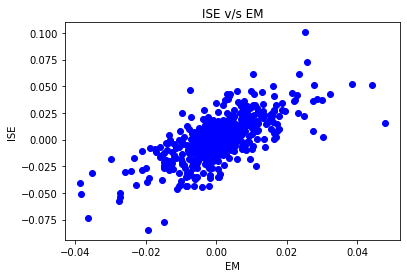

In [ ]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

x = istanbul_stock_exchange['EM']
y = istanbul_stock_exchange['ISE.1']

plt.scatter(x, y, color='b')
plt.title('ISE v/s EM')
plt.xlabel('EM')
plt.ylabel('ISE')
plt.show()

We can see a pattern in the scatter plot where higher values of X correspond to higher values of Y. 
This relationship is a good candidate for modeling through regression.

Below we have a scatter plot of the data points. We can observe that the more years of experience an employee has, the higher their salary. 
This is a linear relationship that can be estimated with simple linear relationship.

In [ ]:
from sklearn.linear_model import LinearRegression

# create an empty linear regression model
simple_linear_model = LinearRegression()

# determine values for the model using the fit method
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
simple_linear_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using the fitted model we can make predictions along a line. Below these predictions are shown in red, and the obversed values are in blue. 

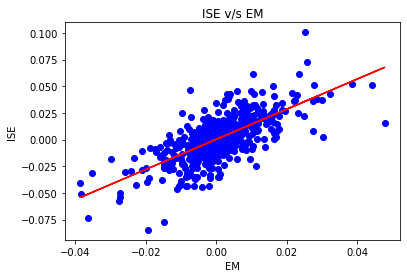

In [ ]:
y_pred = simple_linear_model.predict(x)
plt.scatter(x, y, color='b')
plt.plot(x, y_pred, color='r')
plt.title('ISE v/s EM')
plt.xlabel('EM')
plt.ylabel('ISE')
plt.show()

In [ ]:
# The coefficients
print('Coefficients: \n', linear_model.coef_)

Coefficients: 
 [[1.4119039]]


## Multiple Linear Regression

We can try to make better predictions of the ISE by using more variables. 
For example, we can include also the London, Berlin and European stock exchanges. 

In [93]:
all_x = istanbul_stock_exchange[['EM', 'FTSE', 'DAX', 'EU']].values

multi_lm = LinearRegression()
multi_lm.fit(all_x, y)
print('Coefficients: \n', multi_lm.coef_)

Coefficients: 
 [[ 0.85636536 -0.2198249  -0.2114325   1.05226713]]


## Evaluation

To compare our two models, we can use the R-squared score. This score, also called the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In our case, the scores tell us that involving the European stock indices predicts the target variable a bit better.

In [95]:
simple_r2 = simple_linear_model.score(x, y)
multi_r2 = multi_lm.score(all_x, y)
print(simple_r2, multi_r2)

0.49273911814732885 0.5687491681150642
